<a href="https://colab.research.google.com/github/Molla80/Housing_price_in_India_data_exploration/blob/main/Housing_price_in_India_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization
This project is a first step to house price prediction, i.e. this work focus on different data visualization techniques to identify interesting correlations between features and the label. I used the housing price data of India for this purpose. The dataset can be downloaded from Kaggle @ https://www.kaggle.com/anmolkumar/house-price-prediction-challenge 

In [1]:
# I used my google drive as a data repository. Therefore, the first step into importing the data is to import the <drive> package form google colab. 
from google.colab import drive


In [2]:

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Importing packages required for data visualization and parsing.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Loading the data.
df = pd.read_csv('/content/gdrive/My Drive/house_price_india/train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


The data info shows that there are 29451 samples and twelve columns, of which three have a string type data.

In [6]:
# First check if there are null samples.
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [7]:
# There are no missing samples "Good!". Let me check the head of the data.
df.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [8]:
# Two of the colomns are categorical in the above Table. Thus, these columns have to be converted to dummy variables since Pandas and Numpy  work only with numbers.
df1 = pd.get_dummies(df, columns = ['POSTED_BY','BHK_OR_RK'],)

In [9]:
df1.head(3)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK
0,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1,1,0
1,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0,1,0
2,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0,0,1,1,0


In [10]:
# Now the categorical columns are converted to dummy variables, but the the Col_name of BHK_OR_BK is not very clear so I changed it as follows:
df1 = df1.rename(columns={'BHK_OR_RK_BHK':'BHK','BHK_OR_RK_RK':'RK'})


In [11]:
# Here it can be seen that the column names are changed.
df1.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK,RK
0,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0,0,1,1,0
1,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0,1,0,1,0


To begine the exploration, it would be a good idea to check which features have a strong correlation with the label.  

In [12]:
df1.corr()['TARGET(PRICE_IN_LACS)'].sort_values()

RESALE                  -0.207378
POSTED_BY_Owner         -0.093437
READY_TO_MOVE           -0.055399
LONGITUDE               -0.031112
LATITUDE                -0.017254
RK                      -0.004429
BHK                      0.004429
POSTED_BY_Builder        0.022989
UNDER_CONSTRUCTION       0.055399
RERA                     0.067636
POSTED_BY_Dealer         0.085513
BHK_NO.                  0.112283
SQUARE_FT                0.402685
TARGET(PRICE_IN_LACS)    1.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

From  this correlation, it can be seen that the 'Target' has a strong positive relation with 'Square_ft', also it is positvely correlated with 'BHK_no' and who posted the Ad. On the other hand, it is negatively correlated with 'Resale' and if it is posted by the owner. Finally, it is less likely correlated with 'BHK' and 'RK'. Thus, these columns are not useful for perdiction.   

In [13]:
# It would also be good to have an idea of the range of price percenages. 
# This will be important in the machine learning model development, as well as in data visualization.  
c1 = 0
c2 = 0
c3 = 0
c4 = 0
for i in df1['TARGET(PRICE_IN_LACS)']:
  if i<500:
    c1 = 1+c1
    p1 = (c1/29451)*100
    p1 = round(p1,2)
  elif i>=500 and i<= 1000:
    c2 = 1+c2
    p2 = (c2/29451)*100
    p2 = round(p2,2)
  elif i>1000 and i<1500:
    c3 = 1+c3
    p3 = (c3/29451)*100
    p3 = round(p3,2)
  else:
    c4 = 1+c4
    p4 = (c4/29451)*100
    p4 = round(p4,2)
print(f'The percentage of house prices below 500 is {p1} %')
print(f'The percentage of house prices between 500 and 1000 is {p2} %')
print(f'The percentage of house prices between 1001 and 1499 is {p3} %')
print(f'The percentage of house prices above 1500 is {p4} %')

The percentage of house prices below 500 is 97.52 %
The percentage of house prices between 500 and 1000 is 1.47 %
The percentage of house prices between 1001 and 1499 is 0.29 %
The percentage of house prices above 1500 is 0.73 %


From the price interval percenages it is evident that more than 97% of the houses are in a price range below 500 LACS. Therefore, since this group is the most dominant the data exploration should focus on it. Also, the prediction model can be based on the less than 1000 LACS to avoid overfitting. Because, a model that can perdict house prices less than 1000 LACS will have a 98.99% accuracy and that is within acceptable margine. 

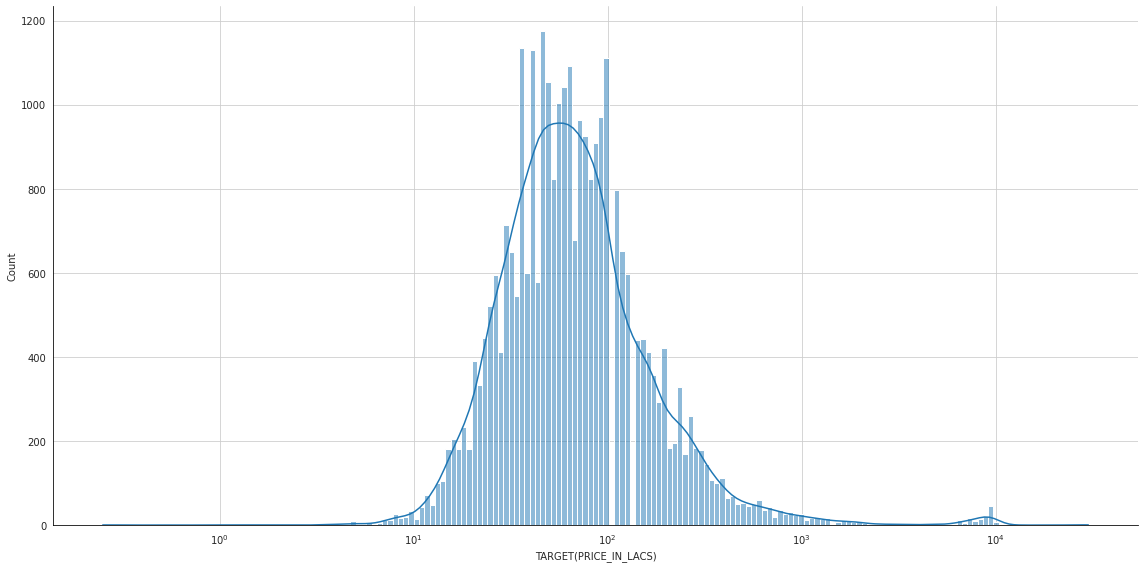

In [14]:
# The Target value can be plotted as a distribution plot since it is a continous function.

sns.set_style('whitegrid', {'axes.linewidth': 2, 'axes.edgecolor':'black'},)
sns.displot(data=df1,x='TARGET(PRICE_IN_LACS)',kind='hist',height=8,aspect=2,kde=True,log_scale=True)
plt.show()

Also, the above plot depicts that the price of the majority of the houses is between 10 and 1000 with another small bump around 10000.

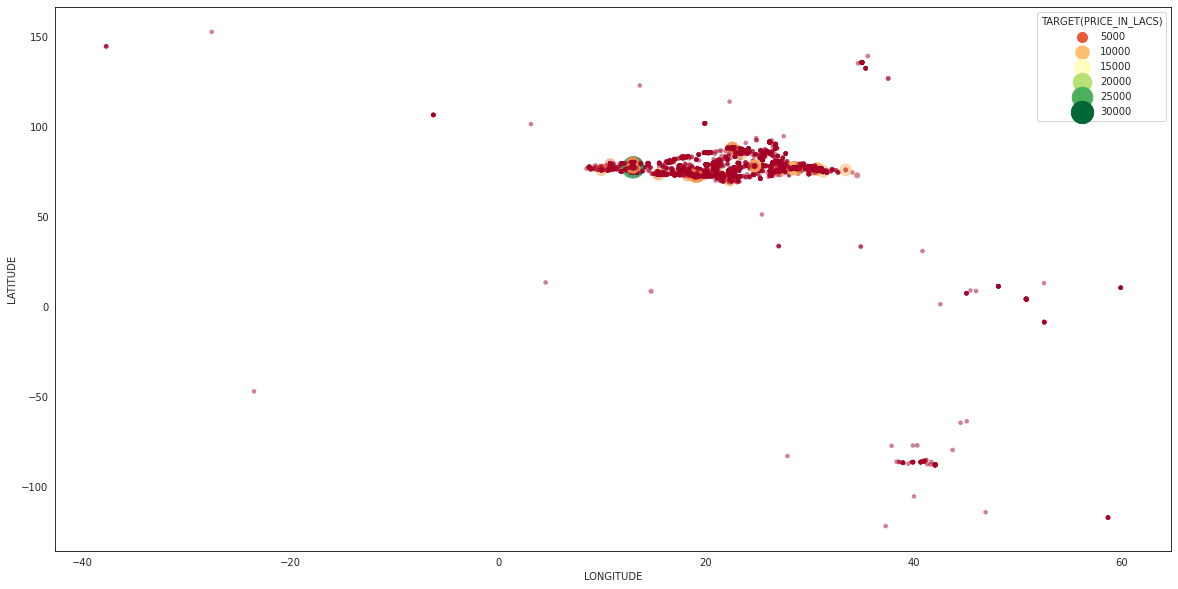

In [15]:
# The latitude and longitude scatteer plot can show if there are any clusters

plt.figure(figsize=(20,10))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=df1,hue=df1['TARGET(PRICE_IN_LACS)'],palette='RdYlGn',size='TARGET(PRICE_IN_LACS)',sizes=(20,500),edgecolor='none',alpha=0.5)
plt.grid()
plt.show()

From the above plot itt can be seen that there is a huge cluster between LAT[60,100] and  LONG[10,35]. But it doesn't tell if the price is based on location preferance, since both the expensive and cheap houses are in the same cluster. Maybe a closer look at the cluster may reveal some story...

In [16]:
# Here is the slice of the cluster.

df2 = df1[(df1['LATITUDE']>60) & (df1['LATITUDE']<100) & (df1['LONGITUDE']>10) & (df1['LONGITUDE']<40)]


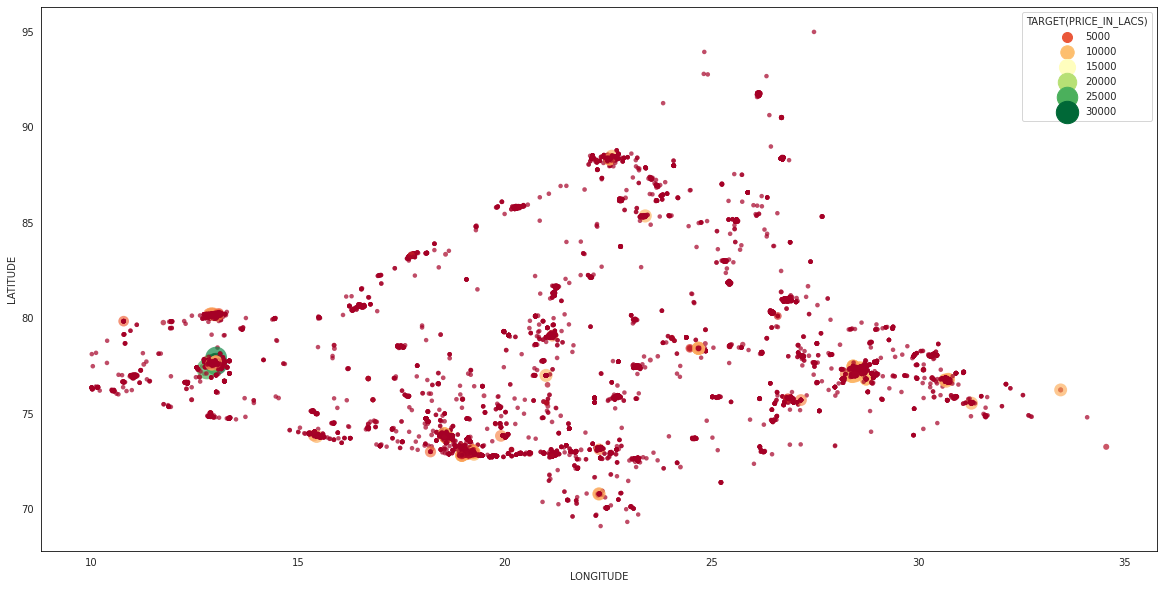

In [17]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=df2,hue=df2['TARGET(PRICE_IN_LACS)'],palette='RdYlGn',size='TARGET(PRICE_IN_LACS)',sizes=(20,500),edgecolor='none',alpha=0.7)
plt.grid()
plt.show()

The cluster map above shows that the most expensive houses (in the range of 25000 to 30000) are cluttered in one place. Otherwise, not much can be side about the cluster. What if the very expensive out liars are cutout. 

In [18]:
# Here creating a data frame with prices less than 10000.

df3 = df1[(df1['TARGET(PRICE_IN_LACS)']<10000)]

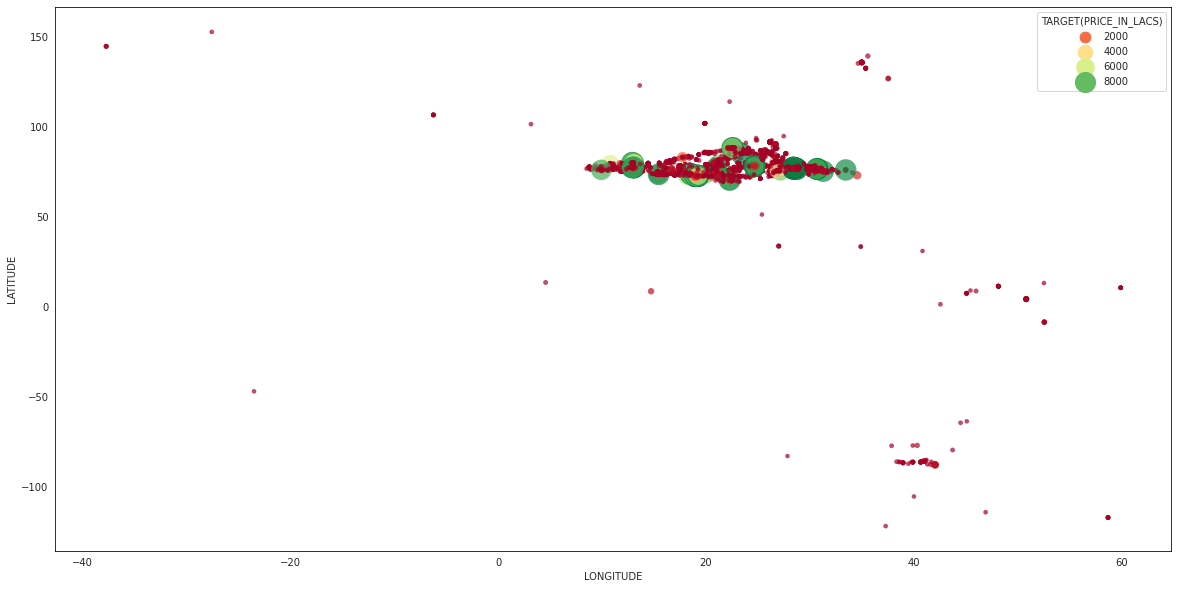

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=df3,hue=df3['TARGET(PRICE_IN_LACS)'],palette='RdYlGn',size='TARGET(PRICE_IN_LACS)',sizes=(20,500),edgecolor='none',alpha=0.7)
plt.grid()
plt.show()

The above scatter map shows that all of the houses within the range of 10000 are in the cluster. From this, one may suggest that training the model using the cluster data might be sufficient (since all the prices are represented in the cluster). 

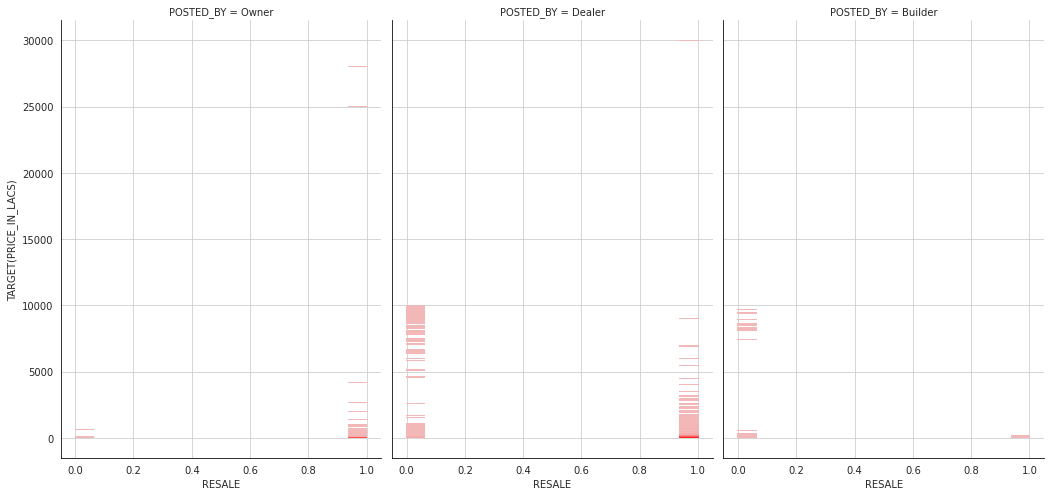

In [20]:
# Checking if there is a relationship among price, resale, and posted_by.

sns.set_style('whitegrid', {'axes.linewidth': 2, 'axes.edgecolor':'black'},)
sns.displot(data=df,x='RESALE',y='TARGET(PRICE_IN_LACS)',height=7, aspect=0.7, col='POSTED_BY',color='Red')

plt.show()

The above plot clearly shows that most houses are posted by Dealers (this may not be surprising since it is intutive). Also, from the houses posted by the Dealers, the new ones are a bit more pricey than the resale ones. On the other hand, few houses are posted by Developers and Owners. And the majority of houses posted by the Developers are new. Whereas, most houses pposted by Owners are resale. In general, this part of the data exploration proves thee obvious.  

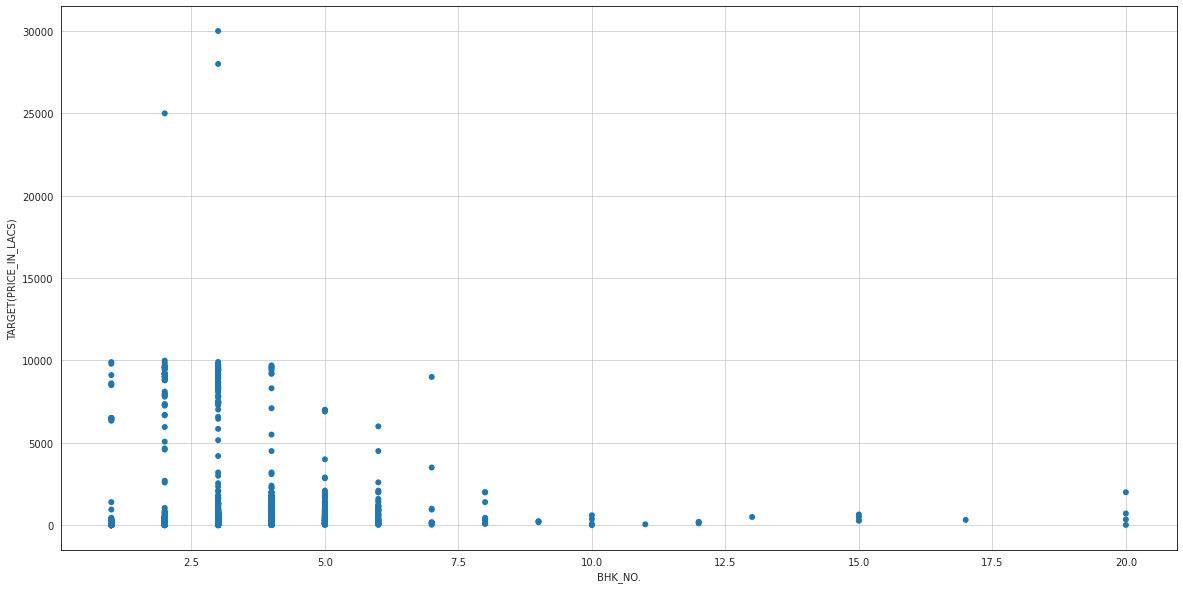

In [21]:
# Check if there is a strong correlation between 'BHK_NO' and price. 

plt.figure(figsize=(20,10))
sns.scatterplot(data=df1,x='BHK_NO.',y='TARGET(PRICE_IN_LACS)',edgecolor='none')
plt.show()

Even though, the meaning of 'BHK_NO' is not clear, thee above scatter plot shows that there is a strong bias of high price towards the lesser value of 'BHK_NO'. 

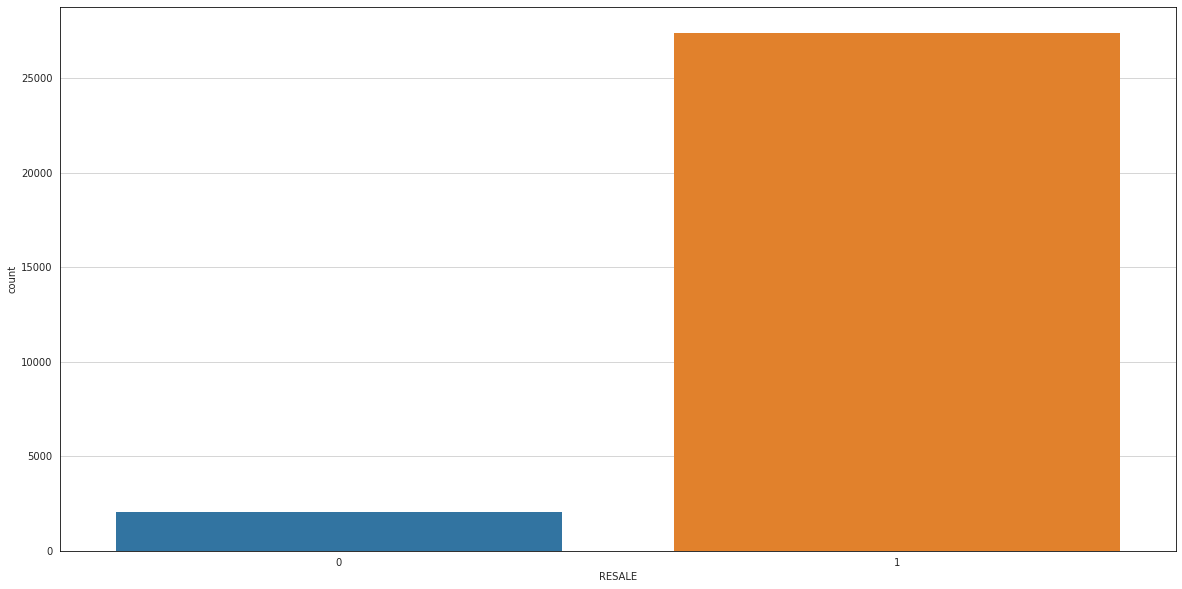

In [22]:
# Comparision between new and resalee houses.

plt.figure(figsize=(20,10))
sns.countplot(data=df1,x='RESALE',edgecolor='none')
plt.show()

Finally, the purpose of this project is to show how data visualization and exploration are important for feature engineering. To this end, the data exploration was successful in away that it has clearly indenified features that can affect the housing price in India. Hence, sorting the features that are important for the machine learning model, and discarding those that are not that much influential.
The next step would be to develope a model, which would be able to satisfactorly peridict the housing prices in India.
Since, 98% of the housing price is between the range of 10 and 1000, it would be sufficient to train the data within this range. Moreover, the correlations of RK & BHK with the price are insignifcant, thus it won't affect the model if dropped. Also, the ADDRESS column is dropped because it has nothing to do with the price.   



In [36]:
# Getting the data between the price range of 10 and 1000.
df4 = df1[(df1['TARGET(PRICE_IN_LACS)']<=1000) & (df1['TARGET(PRICE_IN_LACS)']>=10)]

In [37]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29014 entries, 0 to 29450
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29014 non-null  int64  
 1   RERA                   29014 non-null  int64  
 2   BHK_NO.                29014 non-null  int64  
 3   SQUARE_FT              29014 non-null  float64
 4   READY_TO_MOVE          29014 non-null  int64  
 5   RESALE                 29014 non-null  int64  
 6   ADDRESS                29014 non-null  object 
 7   LONGITUDE              29014 non-null  float64
 8   LATITUDE               29014 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29014 non-null  float64
 10  POSTED_BY_Builder      29014 non-null  uint8  
 11  POSTED_BY_Dealer       29014 non-null  uint8  
 12  POSTED_BY_Owner        29014 non-null  uint8  
 13  BHK                    29014 non-null  uint8  
 14  RK                     29014 non-null  uint8  
dtypes:

In [38]:
df4 = df4.drop('ADDRESS', axis=1)

In [39]:
df4 = df4.drop('BHK', axis=1)
df4 = df4.drop('RK', axis=1)

In [42]:
df4.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)',
       'POSTED_BY_Builder', 'POSTED_BY_Dealer', 'POSTED_BY_Owner'],
      dtype='object')

In [49]:
df4.to_csv('India_housing_price_data.csv')
!cp India_housing_price_data.csv "/content/gdrive/MyDrive/"